In [1]:
import numpy as np
import pandas as pd
import bamboolib as bam

#Mergleme işmeinde kaldık ancak öncesinde genel veri ile alakalı plotlar vs çizdir onları kaydet foto olarak göstermelik


# index 659 dan itibaren 1. de sil

In [2]:
#as we might see if "Modeladi" is null other values are null as well.The internet connection may cause this problem while scrapping from Website
df1 = pd.read_csv("/home/myavuz/Desktop/Uni/Grad/dod[81-145].csv")

# Step: Drop columns
df1 = df1.drop(columns=['web-scraper-order'])

# Step: Drop columns
df1 = df1.drop(columns=['linkgetter'])

# Step: Manipulate strings of 'Fiyat' via Find '₺' and Replace with ''
df1["Fiyat"] = df1["Fiyat"].str.replace('₺', '', regex=False)
# Step: Manipulate strings of '.' via Find '₺' and Replace with ''
df1["Fiyat"] = df1["Fiyat"].str.replace('.', '', regex=False)

# Step: Change data type of Fiyat to Integer
df1['Fiyat'] = df1['Fiyat'].astype('Int64')
Roll = [i for i in range(len(df1))]
df1["RowIndex"] =Roll


# Step: Drop rows where RowIndex >= 659
df1 = df1.loc[~(df1['RowIndex'] >= 659)]

# Step: Drop rows where Modeladi is missing
df1 = df1.loc[~(df1['Modeladi'].isna())]

# Step: Drop columns
df1 = df1.drop(columns=['web-scraper-start-url', 'linkgetter-href', 'RowIndex','Konum_detay'])

df1

       MarkaAdi Modeladi        Renk       Hiz MaxTork  Silindir  Depo  \
0          Ford   Fiesta   Gümüş Gri  167 Km/h     124       4.0  45.0   
1       Peugeot      206   Açık Sarı  172 Km/h     120       4.0  50.0   
2       HYUNDAİ     Getz        Mavi  166 Km/h     119       4.0  45.0   
3          Audi       A6        Mavi  240 Km/h     450       6.0  80.0   
4          Ford   Fusion  Aytozu Gri  176 Km/h     146       4.0  45.0   
..          ...      ...         ...       ...     ...       ...   ...   
653  Volkswagen     Polo       Siyah  175 Km/h     230       4.0  40.0   
654  Volkswagen     Polo     Turuncu  170 Km/h      95       3.0  40.0   
655  Volkswagen     Polo       Siyah  175 Km/h     230       4.0  40.0   
656  Volkswagen     Polo       Beyaz  175 Km/h     230       4.0  40.0   
658  Volkswagen     Polo       Beyaz  170 Km/h      95       3.0  40.0   

     Tuketim  Sübap                                     Guvenlik Group  ...  \
0        8.6   16.0  [{"Guvenlik

In [3]:
df2 = pd.read_csv("/home/myavuz/Desktop/Uni/Grad/dod (1).csv")
# Step: Drop columns
df2 = df2.drop(columns=['web-scraper-order'])

# Step: Drop columns
df2 = df2.drop(columns=['linkgetter'])

# Step: Manipulate strings of 'Fiyat' via Find '₺' and Replace with ''
df2["Fiyat"] = df2["Fiyat"].str.replace('₺', '', regex=False)
# Step: Manipulate strings of '.' via Find '₺' and Replace with ''
df2["Fiyat"] = df2["Fiyat"].str.replace('.', '', regex=False)

# Step: Change data type of Fiyat to Integer
df2['Fiyat'] = df2['Fiyat'].astype('Int64')

# Step: Drop rows where Modeladi is missing
df2 = df2.loc[~(df2['Modeladi'].isna())]

# Step: Drop columns
df2 = df2.drop(columns=['web-scraper-start-url', 'linkgetter-href','Konum_detay'])

# Step: Change data type of Silindir to Object
df2['Silindir'] = df2['Silindir'].astype('object')

import pandas as pd; import numpy as np
# Step: Change data type of Silindir to Float
df2['Silindir'] = pd.to_numeric(df2['Silindir'], downcast='float', errors='coerce')

# Step: Change data type of Depo to Float
df2['Depo'] = pd.to_numeric(df2['Depo'], downcast='float', errors='coerce')

# Step: Change data type of Tuketim to Float
df2['Tuketim'] = pd.to_numeric(df2['Tuketim'], downcast='float', errors='coerce')

# Step: Change data type of Sübap to Float
df2['Sübap'] = pd.to_numeric(df2['Sübap'], downcast='float', errors='coerce')

# Step: Left Join with df1 where Modeladi=Modeladi, MaxTork=MaxTork, Kasa_Tipi=Kasa_Tipi, Haciz_Durum=Haciz_Durum, Yakit=Yakit, Depo=Depo, Aktarma=Aktarma, Rehin_Durum=Rehin_Durum, Sübap=Sübap, Tuketim=Tuketim, Model_Yili=Model_Yili, MarkaAdi=MarkaAdi, Fiyat=Fiyat, Silindir=Silindir, Guvenlik Group=Guvenlik Group, Tsi(Turbo Supercharger Injection)=Tsi(Turbo Supercharger Injection), Max_Güc=Max_Güc, Renk=Renk, Garanti=Garanti, Konum_sehir=Konum_sehir, Sanziman=Sanziman, Hiz=Hiz, Konfor Group=Konfor Group
df = pd.merge(df2, df1, how='outer', on=['Modeladi', 'MaxTork', 'Kasa_Tipi', 'Haciz_Durum', 'Yakit', 'Depo', 'Aktarma', 'Rehin_Durum', 'Sübap', 'Tuketim', 'Model_Yili', 'MarkaAdi', 'Fiyat', 'Silindir', 'Guvenlik Group', 'Tsi(Turbo Supercharger Injection)', 'Max_Güc', 'Renk', 'Garanti', 'Konum_sehir', 'Sanziman', 'Hiz', 'Konfor Group'])

df

        MarkaAdi Modeladi        Renk       Hiz MaxTork  Silindir  Depo  \
0     Volkswagen     Polo     Fildişi  170 Km/h      95       3.0  40.0   
1     Volkswagen     Polo  Uranüs Gri  175 Km/h     230       4.0  40.0   
2     Volkswagen     Polo   Saf Beyaz  175 Km/h     230       4.0  40.0   
3     Volkswagen     Polo       Beyaz  185 Km/h     250       4.0  40.0   
4     Volkswagen     Polo       Beyaz  187 Km/h     175       3.0  40.0   
...          ...      ...         ...       ...     ...       ...   ...   
1512  Volkswagen     Polo       Siyah  175 Km/h     230       4.0  40.0   
1513  Volkswagen     Polo     Turuncu  170 Km/h      95       3.0  40.0   
1514  Volkswagen     Polo       Siyah  175 Km/h     230       4.0  40.0   
1515  Volkswagen     Polo       Beyaz  175 Km/h     230       4.0  40.0   
1516  Volkswagen     Polo       Beyaz  170 Km/h      95       3.0  40.0   

      Tuketim  Sübap                                     Guvenlik Group  ...  \
0         4.1   12.

In [4]:
#df şuan başlangıç hali üstteki hali,hiç haciz ve rehin durumu yok dolayısıyla o columnları düşerecem

#güvenlikGroup için ayrı bi fonksiyon yazıcam bu kaç tane özellik olduğunu direk sayı olarak yazacak yerine 
#KonforGroup için de aynısı geçerli
#Bölge konusunda İstanbul ayrı Ankara ayrı İZmir ayrı kategori kalanlar iç anadolu vs die ayrılabilir 
#Garanti olayı Garantisiz ,0-1 Sene Garantili,1 seneden uzun garantili olarak ayrılabilir
# Step: Drop columns
df = df.drop(columns=['Haciz_Durum', 'Rehin_Durum'])

In [5]:


import pandas as pd; import numpy as np
# Step: Replace  Km/h with  in 'Hiz'
df['Hiz'] = df['Hiz'].replace(' Km/h', ' ')

import pandas as pd; import numpy as np
# Step: Manipulate strings of 'Hiz' via Find 'Km/h' and Replace with ''
df["Hiz"] = df["Hiz"].str.replace('Km/h', '', regex=False)

# Step: Manipulate strings of 'Tsi(Turbo Supercharger Injection)' via Find 'Lt' and Replace with ''
df["Tsi(Turbo Supercharger Injection)"] = df["Tsi(Turbo Supercharger Injection)"].str.replace('Lt', '', regex=False)

# Step: Manipulate strings of 'Max_Güc' via Find 'Hp' and Replace with ''
df["Max_Güc"] = df["Max_Güc"].str.replace('Hp', '', regex=False)

df

        MarkaAdi Modeladi        Renk   Hiz MaxTork  Silindir  Depo  Tuketim  \
0     Volkswagen     Polo     Fildişi  170       95       3.0  40.0      4.1   
1     Volkswagen     Polo  Uranüs Gri  175      230       4.0  40.0      4.5   
2     Volkswagen     Polo   Saf Beyaz  175      230       4.0  40.0      4.5   
3     Volkswagen     Polo       Beyaz  185      250       4.0  40.0      4.5   
4     Volkswagen     Polo       Beyaz  187      175       3.0  40.0      5.8   
...          ...      ...         ...   ...     ...       ...   ...      ...   
1512  Volkswagen     Polo       Siyah  175      230       4.0  40.0      4.5   
1513  Volkswagen     Polo     Turuncu  170       95       3.0  40.0      4.1   
1514  Volkswagen     Polo       Siyah  175      230       4.0  40.0      4.5   
1515  Volkswagen     Polo       Beyaz  175      230       4.0  40.0      4.5   
1516  Volkswagen     Polo       Beyaz  170       95       3.0  40.0      4.1   

      Sübap                            

In [6]:
df["Konfor Group"][0]

'[{"Konfor Group":"Konfor Aksesuarları6 Hoparlör - 6HÇok Fonksiyonlu Direksiyon - FDDireksiyondan K. Müzik SistemiElektrikli Arka Camlar - 2AECElektrikli ve Isıtmalı AynaElektronik Direksiyon AyarıElektro-Servo Direksiyon - ELSHidrolik Direksiyon - HD\xa0Manuel Klima - AC\xa0Yol Bilgisayarı - YBYükseklik Ayarlı Sürücü Koltuğu"}]'

In [7]:
df["Konfor Group"][32]

'[{"Konfor Group":"Konfor Aksesuarları4 Bölgeli Otomatik Klima - 4BK8 Hoparlör - 8HAlüminyum Alaşım Jant - AJArka Kol Dayama - KDCD Çalar - CD\xa0Çok Fonksiyonlu Direksiyon - FDDeri Direksiyon - DDi\xa0Deri Vites Topuzu - DVTDireksiyondan K. Müzik SistemiElektrikli Arka Camlar - 2AECElektrikli Sürücü KoltuğuElektrikli ve Isıtmalı AynaElektronik Direksiyon AyarıElektro-Servo Direksiyon - ELSHız Sabitleyici - CC\xa0Hidrolik Direksiyon - HD\xa0Port Bagaj - PB\xa0Torpido Gözü Soğutması - TGSYol Bilgisayarı - YBYükseklik Ayarlı Yolcu Koltuğu"}]'

In [8]:
gl = []
kl = []
def countForSafety_Confort():
    for i in df["Guvenlik Group"]:
        gl.append(i.count("-"))
    for j in df["Konfor Group"]:
        kl.append(j.count("-"))

In [9]:
countForSafety_Confort()

In [10]:
df["Guvenlik Group"]=gl
df["Konfor Group"] =kl

In [11]:
df
#Renkten yapmaya devam et sonra categorilere çevir doru olanlara sonra one hot encoder sonra modeli kurmaya başla
import pandas as pd; import numpy as np
# Step: Keep rows where Renk contains Gri (case-sensitive, regular expression)
RenkGri = df.loc[df['Renk'].str.contains('Gri', case=True, regex=True, na=False)]



In [12]:
#Renkte 127 tane var.ama bunları biraz azaltmam lazım.Mavi-Açık Mavi-Lacivert gibi 3 kategoriye.Mesela Saf Beyaz ve Beyazı tek kategoriye düşürmek niyetindeyim.Kırmızı BEyaz,Gri-siyah gibi olanları ayrı kategori yapıp çift renk 1-0 olarak orda ayrı bir kategori oluşturuabilirim daha iyi olur

Beyaz-Saf Beyaz-Opak Beyaz-Kar Beyazı-Alp Beyazı-Ibis Beyazı -Sedef Beyaz -Buz Beyazı -Kutup Beyazı -->Beyaz
Siyah- Diğer Siyah tamamı --> Siyah ve Metalik--> Metalik Siyah

Normal Gri --> Gri-Atom Gri-Akik Gri
Açık Gri --> Gümüş Gri-Tungsten Gri -Business Gri-Gri Füme-Platin Gri-Buz Gri-Platınyum Gri-Aytozu Gri-Atlas Gri-Kaya Grisi-Tekno Gri-Hakim Gri-Bulut Gri
Koyu Gri -->Indiyum Grisi-Uranus Gri-Uranüs Gri-Fırtına Gri-Yunus Gri-Füme Granit Gri-Titanyum Gri-Antresit Gri

Normal Mavi--> Mavi
Açık Mavi-->Yarış Mavisi-Sedefli Mürekkep Mavi-Demirci Mavisi-Arıel Mavi-Aruz Mavi-Amparo Mavi-Açık Mavi
Koyu Mavi(Lacivert Yazacam Yerine)--> Harvard Mavi-Atlantik Mavi-Gece Mavisi-Kosmos Mavi-Pasifik Mavisi-Derin Mavi-İpek Mavisi-Okyanus Mavisi-Kozmik Mavi-Koyu Mavi

Normal Kırmızı-->Kırmızı,
AÇık Kırmızı-->Açık Kırmızı,Sedefli Misano Kırmızısı, Parlak Kırmızı 
Koyu Kırmızı-->Alev Kırmızısı,Manyetik Kırmızı,Ateş Kırmızı,Bayrak Kırmızı,Mercan Kırmızı,Tango

Yeşil Kendisi var
Sarı kendisi var sadece

Bordo ve Turkuaz ı ayrı renk olarak AÇık Mavi veya Koyu Kırmızı olarak değiştirdim 

BEj olarak toplasan 5 tane araç var yok o yüzden MEtalik ve normal olarak sınıflandırıcam

Grı ve Safir Siyah ı en sonra ekleyecem

Galapagos Antrasit Gri olarak sayıcam

1 tane menekşe moru var onu da Koyu Mor olarak kaydedicem


In [13]:
# Step: Set values of Renk to Gri where Renk is one of: Gri, Atom Gri, Akik Gri
RenkGri.loc[RenkGri['Renk'].isin(['Gri', 'Atom Gri', 'Akik Gri']), 'Renk'] = 'Gri'
# Step: Set values of Renk to Açık Gri where Renk is one of: Gümüş Gri, Tungsten Gri, Business Gri, Gri Füme, Platınyum Gri, Aytozu Gri, Atlas Gri, Kaya  Grisi, Tekno Gri, Hakim Gri, Bulut Gri
RenkGri.loc[RenkGri['Renk'].isin(['Gümüş Gri', 'Tungsten Gri', 'Business Gri', 'Gri Füme', 'Platınyum Gri','Platin Gri','Buz Gri', 'Aytozu Gri', 'Atlas Gri', 'Kaya  Grisi', 'Tekno Gri', 'Hakim Gri', 'Bulut Gri']), 'Renk'] = 'Açık Gri'
# Step: Set values of MarkaAdi to Koyu Gri where Renk is one of: İndiyum Grisi, Uranüs Gri, Uranus Gri, Fırtına Gri, Yunus Gri, Füme Granit Gri, Titanyum Gri, Antresit Gri
RenkGri.loc[RenkGri['Renk'].isin(['İndiyum Grisi', 'Uranüs Gri', 'Uranus Gri', 'Fırtına Gri', 'Yunus Gri', 'Füme Granit Gri', 'Titanyum Gri', 'Antresit Gri','Duman Gri']), 'Renk'] = 'Koyu Gri'
# Step: Set values of Renk to Metalik Gri where Renk is one of: Metalik Muson Gri, Metalik Floret Gümüş Grisi, Metalik Gri, Metalik Teknik Gri, Metalik Manhattan Gri, Metalik Estrella Gri
RenkGri.loc[RenkGri['Renk'].isin(['Metalik Muson Gri', 'Metalik Floret Gümüş Grisi', 'Metalik Gri', 'Metalik Teknik Gri', 'Metalik Manhattan Gri', 'Metalik Estrella Gri']), 'Renk'] = 'Metalik Gri'
# Step: Set values of MarkaAdi to Gri Siyah where Renk is one of: Gri Siyah, Gri-siyah
RenkGri.loc[RenkGri['Renk'].isin(['Gri Siyah', 'Gri-siyah']), 'Renk'] = 'Gri Siyah'

RenkGri = RenkGri["Renk"]
RenkGri

1          Koyu Gri
16         Açık Gri
17         Açık Gri
22              Gri
25         Açık Gri
           ...     
1496    Metalik Gri
1497            Gri
1498       Açık Gri
1499            Gri
1511       Koyu Gri
Name: Renk, Length: 351, dtype: object

In [14]:
df["Renk"].loc[df['Renk'].str.contains('Gri', case=True, regex=True, na=False)] = RenkGri #Sonunda bölmesine yaparak olayı bitiriyoruz

In [15]:
RenkBeyaz = df.loc[df['Renk'].str.contains('Beyaz', case=True, regex=True, na=False)]
import pandas as pd; import numpy as np
# Step: Set values of Renk to Beyaz where Renk is one of: Saf Beyaz, Beyaz, Buz Beyazı, Alp Beyazı, Opak Beyaz, İnci Beyazı, Sedef Beyaz, Kutup Beyazı, Kar Beyazı, Şeker Beyazı, Ibis Beyazı, Opak Bila Beyaz
RenkBeyaz.loc[RenkBeyaz['Renk'].isin(['Saf Beyaz', 'Beyaz', 'Buz Beyazı', 'Alp Beyazı', 'Opak Beyaz', 'İnci Beyazı', 'Sedef Beyaz', 'Kutup Beyazı', 'Kar Beyazı', 'Şeker Beyazı', 'Ibis Beyazı', 'Opak Bila Beyaz']), 'Renk'] = 'Beyaz'

RenkBeyaz =RenkBeyaz["Renk"]

In [16]:
df["Renk"].loc[df['Renk'].str.contains('Beyaz', case=True, regex=True, na=False)] = RenkBeyaz

In [17]:
RenkSiyah = df.loc[df['Renk'].str.contains('Siyah', case=True, regex=True, na=False)]
import pandas as pd; import numpy as np
# Step: Set values of Renk to Siyah where Renk is one of: Basalt Siyahı, Siyah, Metalik Siyah, Derin Siyah, Kahve Siyah, Opak Siyah, Gece Siyahı, Büyülü Siyah, Siyah İnci, İnci Siyah, Parlak Siyah
RenkSiyah.loc[RenkSiyah['Renk'].isin(['Basalt Siyahı', 'Siyah', 'Metalik Siyah', 'Derin Siyah', 'Kahve Siyah', 'Opak Siyah', 'Gece Siyahı', 'Büyülü Siyah', 'Siyah İnci', 'İnci Siyah', 'Parlak Siyah']), 'Renk'] = 'Siyah'

# Step: Set values of MarkaAdi to Metalik Siyah where Renk is one of: Metalik Mitos Siyah, Metlik Mitos Siyah
RenkSiyah.loc[RenkSiyah['Renk'].isin(['Metalik Mitos Siyah', 'Metlik Mitos Siyah']), 'Renk'] = 'Metalik Siyah'

import pandas as pd; import numpy as np
# Step: Set values of MarkaAdi to Beyaz Siyah where Renk is one of: Beyaz Siyah, Siyah-beyaz
RenkSiyah.loc[RenkSiyah['Renk'].isin(['Beyaz Siyah', 'Siyah-beyaz']), 'MarkaAdi'] = 'Beyaz Siyah'

RenkSiyah = RenkSiyah["Renk"]
RenkSiyah

13      Siyah
18      Siyah
32      Siyah
42      Siyah
53      Siyah
        ...  
1477    Siyah
1485    Siyah
1501    Siyah
1512    Siyah
1514    Siyah
Name: Renk, Length: 228, dtype: object

In [18]:
df["Renk"].loc[df['Renk'].str.contains('Siyah', case=True, regex=True, na=False)] = RenkSiyah

In [19]:
RenkMavi = df.loc[df['Renk'].str.contains('Mavi', case=True, regex=True, na=False)]
RenkMavi
import pandas as pd; import numpy as np
# Step: Set values of Renk to Lacivert where Renk is one of: Harvard Mavi, Atlantik Mavi, Gece Mavisi, Koyu Mavi, Kozmik Mavi, Kosmos Mavi, Pasifik Mavisi, Derin Mavi, İpek Mavisi, Okyanus Mavisi
RenkMavi.loc[RenkMavi['Renk'].isin(['Harvard Mavi', 'Atlantik Mavi', 'Gece Mavisi', 'Koyu Mavi', 'Kozmik Mavi', 'Kosmos Mavi', 'Cosmos Mavi','Pasifik Mavisi', 'Derin Mavi', 'İpek Mavisi', 'Okyanus Mavisi']), 'Renk'] = 'Lacivert'

# Step: Set values of Renk to Açık Mavi where Renk is one of: Yarış Mavisi, Sedefli Mürekkep Mavi, Demirci Mavisi, Arıel Mavi, Aruz Mavi, Amparo Mavi, Açık Mavi
RenkMavi.loc[RenkMavi['Renk'].isin(['Yarış Mavisi', 'Sedefli Mürekkep Mavi', 'Demirci Mavisi', 'Arıel Mavi', 'Aruz Mavi', 'Amparo Mavi', 'Açık Mavi']), 'Renk'] = 'Açık Mavi'

# Step: Set values of Renk to Metalik Mavi where Renk is one of: Metalik Kosmos Mavisi-gri Tent, Metalik Hainan Mavisi, Metalik Scuba Mavi, Metalik Mavi
RenkMavi.loc[RenkMavi['Renk'].isin(['Metalik Kosmos Mavisi-gri Tent', 'Metalik Hainan Mavisi', 'Metalik Scuba Mavi', 'Metalik Mavi']), 'Renk'] = 'Metalik Mavi'

RenkMavi =RenkMavi["Renk"]
RenkMavi

30          Lacivert
31          Lacivert
56          Lacivert
59              Mavi
67         Açık Mavi
            ...     
1405            Mavi
1407    Metalik Mavi
1408            Mavi
1412            Mavi
1422            Mavi
Name: Renk, Length: 136, dtype: object

In [20]:
df["Renk"].loc[df['Renk'].str.contains('Mavi', case=True, regex=True, na=False)] = RenkMavi

In [21]:
#ayrıcana lacivert rengi de var 5 tane araç için öle yazılmış
RenkLacivert = df.loc[df['Renk'].str.contains('Lacivert', case=True, regex=True, na=False)]
RenkLacivert

        MarkaAdi   Modeladi      Renk   Hiz MaxTork  Silindir  Depo  Tuketim  \
30    Volkswagen     Passat  Lacivert  208      200       4.0  59.0      6.8   
31    Volkswagen     Passat  Lacivert  206      250       4.0  59.0      4.6   
56    Volkswagen     Passat  Lacivert  206      250       4.0  59.0      4.6   
174   Volkswagen     Passat  Lacivert  205      250       4.0  59.0      4.6   
217         Audi         A3  Lacivert  224      250       4.0  50.0      6.2   
226         Audi         A3  Lacivert  224      250       4.0  50.0      6.2   
286          KIA        Rio  Lacivert  185      172       3.0  45.0      5.5   
288          KIA   Sportage  Lacivert  180      320       4.0  62.0      NaN   
403   Volkswagen       Golf  Lacivert  216      250       4.0  50.0      6.5   
468   Volkswagen     Passat  Lacivert  220      250       4.0  59.0      6.6   
473   Volkswagen     Passat  Lacivert  247      500       4.0  66.0      6.7   
528          BMW   5 Serisi  Lacivert  2

In [22]:
RenkKırmızı = df.loc[df['Renk'].str.contains('Kırmızı', case=True, regex=True, na=False)]
import pandas as pd; import numpy as np
# Step: Set values of Renk to Açık Kırmızı where Renk is one of: Açık Kırmızı, Sedefli Misano Kırmızısı, Parlak Kırmızı
RenkKırmızı.loc[RenkKırmızı['Renk'].isin(['Açık Kırmızı', 'Sedefli Misano Kırmızısı', 'Parlak Kırmızı']), 'Renk'] = 'Açık Kırmızı'

# Step: Set values of Renk to Koyu Kırmızı where Renk is one of: Bayrak Kırmızı, Manyetik Kırmızı, Alev Kırmızısı, Mercan Kırmızı, Ateş Kırmızı, Tango Kırmızı
RenkKırmızı.loc[RenkKırmızı['Renk'].isin(['Bayrak Kırmızı', 'Manyetik Kırmızı', 'Alev Kırmızısı', 'Mercan Kırmızı', 'Ateş Kırmızı', 'Tango Kırmızı']), 'Renk'] = 'Koyu Kırmızı'

RenkKırmızı=RenkKırmızı["Renk"]
RenkKırmızı

28         Açık Kırmızı
37              Kırmızı
91         Koyu Kırmızı
135             Kırmızı
138             Kırmızı
             ...       
1411            Kırmızı
1419       Koyu Kırmızı
1421            Kırmızı
1458    Metalik Kırmızı
1459            Kırmızı
Name: Renk, Length: 112, dtype: object

In [23]:
df["Renk"].loc[df['Renk'].str.contains('Kırmızı', case=True, regex=True, na=False)] = RenkKırmızı

In [24]:
RenkTuruncu = df.loc[df['Renk'].str.contains('Turuncu', case=True, regex=True, na=False)]
import pandas as pd; import numpy as np
# Step: Set values of Renk to Koyu Turuncu where Renk is one of: Bakır Turuncu
RenkTuruncu.loc[RenkTuruncu['Renk'].isin(['Bakır Turuncu']), 'Renk'] = 'Koyu Turuncu'

RenkTuruncu=RenkTuruncu["Renk"]
RenkTuruncu

77           Turuncu
139          Turuncu
143          Turuncu
307          Turuncu
311          Turuncu
312          Turuncu
318          Turuncu
329          Turuncu
400          Turuncu
417          Turuncu
624          Turuncu
639          Turuncu
640          Turuncu
686          Turuncu
693          Turuncu
829     Koyu Turuncu
830          Turuncu
1272         Turuncu
1513         Turuncu
Name: Renk, dtype: object

In [25]:
df["Renk"].loc[df['Renk'].str.contains('Turuncu', case=True, regex=True, na=False)] = RenkTuruncu

In [26]:
RenkGümüş = df.loc[df['Renk'].str.contains('Gümüş', case=True, regex=True, na=False)]
import pandas as pd; import numpy as np
# Step: Set values of Renk to Gümüş where Renk is one of: Pirit Gümüş, Elmas Gümüş, Refleks Gümüş
RenkGümüş.loc[RenkGümüş['Renk'].isin(['Pirit Gümüş', 'Elmas Gümüş', 'Refleks Gümüş']), 'Renk'] = 'Gümüş'

RenkGümüş=RenkGümüş["Renk"]
RenkGümüş

35      Gümüş
173     Gümüş
387     Gümüş
388     Gümüş
405     Gümüş
441     Gümüş
875     Gümüş
1337    Gümüş
1340    Gümüş
1359    Gümüş
1362    Gümüş
1470    Gümüş
Name: Renk, dtype: object

In [27]:
df["Renk"].loc[df['Renk'].str.contains('Gümüş', case=True, regex=True, na=False)] = RenkGümüş

In [28]:
RenkFüme=df.loc[df['Renk'].str.contains('Füme', case=True, regex=True, na=False)]
import pandas as pd; import numpy as np
# Step: Set values of Renk to Koyu Gri where Renk is one of: Füme
RenkFüme.loc[RenkFüme['Renk'].isin(['Füme']), 'Renk'] = 'Koyu Gri'

RenkFüme=RenkFüme['Renk']
RenkFüme

74      Koyu Gri
517     Koyu Gri
673     Koyu Gri
715     Koyu Gri
1266    Koyu Gri
Name: Renk, dtype: object

In [29]:
df["Renk"].loc[df['Renk'].str.contains('Füme', case=True, regex=True, na=False)] = RenkFüme

In [30]:
df

        MarkaAdi Modeladi      Renk   Hiz MaxTork  Silindir  Depo  Tuketim  \
0     Volkswagen     Polo   Fildişi  170       95       3.0  40.0      4.1   
1     Volkswagen     Polo  Koyu Gri  175      230       4.0  40.0      4.5   
2     Volkswagen     Polo     Beyaz  175      230       4.0  40.0      4.5   
3     Volkswagen     Polo     Beyaz  185      250       4.0  40.0      4.5   
4     Volkswagen     Polo     Beyaz  187      175       3.0  40.0      5.8   
...          ...      ...       ...   ...     ...       ...   ...      ...   
1512  Volkswagen     Polo     Siyah  175      230       4.0  40.0      4.5   
1513  Volkswagen     Polo   Turuncu  170       95       3.0  40.0      4.1   
1514  Volkswagen     Polo     Siyah  175      230       4.0  40.0      4.5   
1515  Volkswagen     Polo     Beyaz  175      230       4.0  40.0      4.5   
1516  Volkswagen     Polo     Beyaz  170       95       3.0  40.0      4.1   

      Sübap  Guvenlik Group  ...  Kasa_Tipi Konfor Group  \
0  

In [31]:
RenkBej=df.loc[df['Renk'].str.contains('Bej', case=True, regex=True, na=False)]
import pandas as pd; import numpy as np
# Step: Set values of Renk to Bej where Renk is one of: Mojave Bej, Kahverengi Bej, Kapuçino Beji, Metalik Karat Beji
RenkBej.loc[RenkBej['Renk'].isin(['Mojave Bej', 'Kahverengi Bej', 'Kapuçino Beji', 'Metalik Karat Beji']), 'Renk'] = 'Bej'

RenkBej=RenkBej["Renk"]
RenkBej

164     Bej
1072    Bej
1141    Bej
1181    Bej
1249    Bej
Name: Renk, dtype: object

In [32]:
df["Renk"].loc[df['Renk'].str.contains('Bej', case=True, regex=True, na=False)] = RenkBej

In [33]:
import pandas as pd; import numpy as np
# Step: Set values of Renk to Gri where Renk is one of: Grı, Galapagos Antrasit
df.loc[df['Renk'].isin(['Grı', 'Galapagos Antrasit']), 'Renk'] = 'Gri'

# Step: Set values of Renk to Koyu Mor where Renk is one of: Menekşe Moru
df.loc[df['Renk'].isin(['Menekşe Moru']), 'Renk'] = 'Koyu Mor'

# Step: Set values of Renk to Koyu Kırmızı where Renk is one of: Bordo
df.loc[df['Renk'].isin(['Bordo']), 'Renk'] = 'Koyu Kırmızı'

# Step: Set values of Renk to Açık Mavi where Renk is one of: Turkuaz
df.loc[df['Renk'].isin(['Turkuaz']), 'Renk'] = 'Açık Mavi'

# Step: Set values of Renk to Metalik Siyah where Renk is one of: Safir Siyah
df.loc[df['Renk'].isin(['Safir Siyah']), 'Renk'] = 'Metalik Siyah'

# Step: Set values of Renk to Beyaz Siyah where Renk is one of: Siyah-beyaz
df.loc[df['Renk'].isin(['Siyah-beyaz']), 'Renk'] = 'Beyaz Siyah'

df

#RENKLER BURADA BİTTİ

        MarkaAdi Modeladi      Renk   Hiz MaxTork  Silindir  Depo  Tuketim  \
0     Volkswagen     Polo   Fildişi  170       95       3.0  40.0      4.1   
1     Volkswagen     Polo  Koyu Gri  175      230       4.0  40.0      4.5   
2     Volkswagen     Polo     Beyaz  175      230       4.0  40.0      4.5   
3     Volkswagen     Polo     Beyaz  185      250       4.0  40.0      4.5   
4     Volkswagen     Polo     Beyaz  187      175       3.0  40.0      5.8   
...          ...      ...       ...   ...     ...       ...   ...      ...   
1512  Volkswagen     Polo     Siyah  175      230       4.0  40.0      4.5   
1513  Volkswagen     Polo   Turuncu  170       95       3.0  40.0      4.1   
1514  Volkswagen     Polo     Siyah  175      230       4.0  40.0      4.5   
1515  Volkswagen     Polo     Beyaz  175      230       4.0  40.0      4.5   
1516  Volkswagen     Polo     Beyaz  170       95       3.0  40.0      4.1   

      Sübap  Guvenlik Group  ...  Kasa_Tipi Konfor Group  \
0  

In [34]:
import pandas as pd; import numpy as np
# Step: Keep rows where Modeladi contains Clio (case-sensitive, regular expression)
Clio = df.loc[df['Modeladi'].str.contains('Clio', case=True, regex=True, na=False)]# There're Clio Sport Tourer and Clio.We ll assume they're similiar

import pandas as pd; import numpy as np
# Step: Set values of Modeladi to Clio where Modeladi contains Clio (case-sensitive, regular expression)
df.loc[df['Modeladi'].str.contains('Clio', case=True, regex=True, na=False), 'Modeladi'] = 'Clio'

Passat = df.loc[df['Modeladi'].str.contains('Passat', case=True, regex=True, na=False)]#There're Passat and Passat Variant
df.loc[df['Modeladi'].str.contains('Passat', case=True, regex=True, na=False), 'Modeladi'] = 'Passat'
import pandas as pd; import numpy as np
# Step: Set values of Modeladi to Q3 where Modeladi contains Q3 (case-sensitive, regular expression)
df.loc[df['Modeladi'].str.contains('Q3', case=True, regex=True, na=False), 'Modeladi'] = 'Q3'

# Step: Keep rows where Modeladi contains 2 Serisi (case-sensitive, regular expression)
df2Serisi = df.loc[df['Modeladi'].str.contains('2 Serisi', case=True, regex=True, na=False)]#here're 2 Serisi and 2 Serisi Active Tourer

df

import pandas as pd; import numpy as np
# Step: Set values of Modeladi to 2 Serisi where Modeladi contains 2 Serisi (case-sensitive, regular expression)
df.loc[df['Modeladi'].str.contains('2 Serisi', case=True, regex=True, na=False), 'Modeladi'] = '2 Serisi'

dfFiorino = df.loc[df['Modeladi'].str.contains('Fiorino', case=True, regex=True, na=False)]#here're Fiorino and Fiorino Panorama

df.loc[df['Modeladi'].str.contains('Fiorino', case=True, regex=True, na=False), 'Modeladi'] = 'Fiorino'

import pandas as pd; import numpy as np
# Step: Keep rows where Modeladi contains 500 (case-sensitive, regular expression)
df500 = df.loc[df['Modeladi'].str.contains('500', case=True, regex=True, na=False)] #3 model for Fiat 500,500X,500L

import pandas as pd; import numpy as np
# Step: Set values of MarkaAdi to 500 where (Modeladi contains 500 (case-sensitive, regular expression)) and (MarkaAdi is one of: Fiat)
df.loc[(df['Modeladi'].str.contains('500', case=True, regex=True, na=False)) & (df['MarkaAdi'].isin(['Fiat'])), 'MarkaAdi'] = '500'

import pandas as pd; import numpy as np
# Step: Set values of Modeladi to 500 where Modeladi is one of: 500, 500L, 500X
df.loc[df['Modeladi'].isin(['500', '500L', '500X']), 'Modeladi'] = '500'

new_items = [a+" "+b for a,b in zip(df["MarkaAdi"],df["Modeladi"])] 
new_items
df["Marka_Model"] =new_items
import pandas as pd; import numpy as np
# Step: Rearranged the order of the columns
df = df[['Marka_Model'] + ['MarkaAdi', 'Modeladi', 'Renk', 'Hiz', 'MaxTork', 'Silindir', 'Depo', 'Tuketim', 'Sübap', 'Guvenlik Group', 'Model_Yili', 'Kasa_Tipi', 'Konfor Group', 'Tsi(Turbo Supercharger Injection)', 'Yakit', 'Sanziman', 'Max_Güc', 'Garanti', 'Aktarma', 'Konum_sehir', 'Fiyat']]

# Step: Drop columns
#ŞİMDİLİK###df = df.drop(columns=['MarkaAdi', 'Modeladi'])

# Step: Set values of Garanti to 1 Yıla Kadar where Garanti is one of: 3 Aylık DOD Garanti, 1 Yıllık DOD Garanti, 6 Aylık DOD Garanti
df.loc[df['Garanti'].isin(['3 Aylık DOD Garanti', '1 Yıllık DOD Garanti', '6 Aylık DOD Garanti']), 'Garanti'] = '1 Yıla Kadar'

# Step: Set values of Garanti to 1 YIldan Uzun where Garanti is one of: DS Garantisi
df.loc[df['Garanti'].isin(['DS Garantisi']), 'Garanti'] = '1 YIldan Uzun'

# Step: Change data type of Hiz to Integer
df['Hiz'] = pd.to_numeric(df['Hiz'], downcast='integer', errors='coerce')

# Step: Change data type of MaxTork to Integer
df['MaxTork'] = pd.to_numeric(df['MaxTork'], downcast='integer', errors='coerce')

# Step: Change data type of Max_Güc to Integer
df['Max_Güc'] = pd.to_numeric(df['Max_Güc'], downcast='integer', errors='coerce')




In [35]:


import pandas as pd; import numpy as np
# Step: Set values of Konum_sehir to Marmara Bölgesi where Konum_sehir is one of: İstanbul, Bursa, Kocaeli, Çanakkale, Sakarya
df.loc[df['Konum_sehir'].isin(['İstanbul', 'Bursa', 'Kocaeli', 'Çanakkale', 'Balıkesir','Tekirdağ','Sakarya']), 'Konum_sehir'] = 'Marmara Bölgesi'

import pandas as pd; import numpy as np
# Step: Set values of Konum_sehir to Akdeniz Bölgesi where Konum_sehir is one of: Hatay, Antalya, Kahramanmaraş, Mersin, Adana
df.loc[df['Konum_sehir'].isin(['Hatay', 'Antalya', 'Kahramanmaraş', 'Mersin', 'Adana']), 'Konum_sehir'] = 'Akdeniz Bölgesi'

# Step: Set values of Konum_sehir to Ege Bölgesi where Konum_sehir is one of: İzmir, Denizli, Manisa, Aydın
df.loc[df['Konum_sehir'].isin(['İzmir', 'Denizli', 'Manisa', 'Aydın']), 'Konum_sehir'] = 'Ege Bölgesi'

import pandas as pd; import numpy as np
# Step: Set values of Konum_sehir to İç Anadolu Bölgesi where Konum_sehir is one of: Konya, Ankara, Aksaray, Kayseri
df.loc[df['Konum_sehir'].isin(['Konya', 'Ankara', 'Aksaray', 'Kayseri']), 'Konum_sehir'] = 'İç Anadolu Bölgesi'

# Step: Set values of Konum_sehir to Karadeniz Bölgesi where Konum_sehir is one of: Çorum, Samsun, Giresun
df.loc[df['Konum_sehir'].isin(['Çorum', 'Samsun', 'Giresun']), 'Konum_sehir'] = 'Karadeniz Bölgesi'

# Step: Set values of Konum_sehir to GüneyDoğu Anadolu Bölgesi where Konum_sehir is one of: Gaziantep, Şanlıurfa
df.loc[df['Konum_sehir'].isin(['Gaziantep', 'Şanlıurfa']), 'Konum_sehir'] = 'GüneyDoğu Anadolu Bölgesi'

# Step: Rename column
df = df.rename(columns={'Konum_sehir': 'Konum'})





In [36]:
df

          Marka_Model    MarkaAdi Modeladi      Renk    Hiz  MaxTork  \
0     Volkswagen Polo  Volkswagen     Polo   Fildişi  170.0     95.0   
1     Volkswagen Polo  Volkswagen     Polo  Koyu Gri  175.0    230.0   
2     Volkswagen Polo  Volkswagen     Polo     Beyaz  175.0    230.0   
3     Volkswagen Polo  Volkswagen     Polo     Beyaz  185.0    250.0   
4     Volkswagen Polo  Volkswagen     Polo     Beyaz  187.0    175.0   
...               ...         ...      ...       ...    ...      ...   
1512  Volkswagen Polo  Volkswagen     Polo     Siyah  175.0    230.0   
1513  Volkswagen Polo  Volkswagen     Polo   Turuncu  170.0     95.0   
1514  Volkswagen Polo  Volkswagen     Polo     Siyah  175.0    230.0   
1515  Volkswagen Polo  Volkswagen     Polo     Beyaz  175.0    230.0   
1516  Volkswagen Polo  Volkswagen     Polo     Beyaz  170.0     95.0   

      Silindir  Depo  Tuketim  Sübap  ...  Kasa_Tipi  Konfor Group  \
0          3.0  40.0      4.1   12.0  ...  Hatchback             

In [37]:
#Şimdi bütün türleri çevirme RehinDurumu gibi gereksizleri atma ardından OneHotEncoder,LabelEncoder 


import pandas as pd; import numpy as np
# Step: Keep rows where Yakit is one of: Elektrik
df_elek = df.loc[df['Yakit'].isin(['Elektrik'])] ##BUNU SİLMEYİ DÜŞÜNÜYORUM ÇÜNKÜ 1 TANE VAR


import pandas as pd; import numpy as np
# Step: Drop rows where Yakit is one of: Elektrik
df = df.loc[~(df['Yakit'].isin(['Elektrik']))]

# Step: Keep rows where Marka_Model is one of: 500 500
dfnb = df.loc[df['Marka_Model'].isin(['500 500'])]

dfnb

     Marka_Model MarkaAdi Modeladi           Renk    Hiz  MaxTork  Silindir  \
267      500 500      500      500          Beyaz  163.0    200.0       4.0   
1053     500 500      500      500  Kırmızı Siyah  181.0    320.0       4.0   
1054     500 500      500      500  Kırmızı Beyaz  160.0    102.0       4.0   
1129     500 500      500      500          Beyaz  169.0    215.0       4.0   
1263     500 500      500      500     Kahverengi  186.0    320.0       4.0   

      Depo  Tuketim  Sübap  ...    Kasa_Tipi  Konfor Group  \
267   50.0      4.8   16.0  ...          MPV            14   
1053  50.0      5.4   16.0  ...          MPV            18   
1054  35.0      6.4    8.0  ...    Hatchback            12   
1129  50.0      NaN   16.0  ...          MPV            16   
1263  48.0      4.8   16.0  ...  Arazi aracı            15   

     Tsi(Turbo Supercharger Injection)   Yakit  Sanziman Max_Güc  \
267                               1.2    Dizel  Otomatik      95   
1053            

In [38]:
df

          Marka_Model    MarkaAdi Modeladi      Renk    Hiz  MaxTork  \
0     Volkswagen Polo  Volkswagen     Polo   Fildişi  170.0     95.0   
1     Volkswagen Polo  Volkswagen     Polo  Koyu Gri  175.0    230.0   
2     Volkswagen Polo  Volkswagen     Polo     Beyaz  175.0    230.0   
3     Volkswagen Polo  Volkswagen     Polo     Beyaz  185.0    250.0   
4     Volkswagen Polo  Volkswagen     Polo     Beyaz  187.0    175.0   
...               ...         ...      ...       ...    ...      ...   
1512  Volkswagen Polo  Volkswagen     Polo     Siyah  175.0    230.0   
1513  Volkswagen Polo  Volkswagen     Polo   Turuncu  170.0     95.0   
1514  Volkswagen Polo  Volkswagen     Polo     Siyah  175.0    230.0   
1515  Volkswagen Polo  Volkswagen     Polo     Beyaz  175.0    230.0   
1516  Volkswagen Polo  Volkswagen     Polo     Beyaz  170.0     95.0   

      Silindir  Depo  Tuketim  Sübap  ...  Kasa_Tipi  Konfor Group  \
0          3.0  40.0      4.1   12.0  ...  Hatchback             

In [39]:
#Label Encoder yapacaklarımız var: Konum genelde en pahalı olduğu yerden(en büyük sayıyı o alacak) en ucuz olan yere bi sıralama yapıcaz.
#                                  Aktarma : 4x4 > Önden Çekiş > Arkadan Çekiş
#                                  Garanti: 1 yıldan uzun > 1 yıla kadar > Garantisiz
#                                  Sanziman: Otomatik > Manuel
#                                  Yakıt:Benzin > Dizel > LPG
#                                  Marka_Model: BUnda şöle yapıcaz sildiğim MarkaAdi ve ModelAdi columlarını kaldırmadan fiyat durumu ortalamasına bakıcaz ona göre mesela Golf>Polo diecez fiyat ortalamalarına bakıp bölemesine kendi içlerinde sıralama yaptıktan sonra diğer modelde anı şekilde sıralama yapıcaz ondan sonra sallıyorum WV de 10 model var Skoda da 5 model var o durumda fiyat ortalaması hangisine yakınsa orda manuel bi encodeing yapıcam ardından Marka adını tek başına ONEHOTENCODİNG YAPICAZ.Bunu yapmam da biraz uzun sürecek tabi ama başka türlü işin içinden çıkamam
#                                  Model yılı konusunda:Tersine bi Label ENcoding yapıcaz nası yapıcam bilmiyorum ona bakıcam.Yani 2023 Model araç 2013 modelden daha değerli olmalı


In [40]:
#df.to_csv('file2.csv', header=True, index=False)

In [41]:
#Alfa Romeo yu manuel olarak alıcaz
from collections import defaultdict
# Create a defaultdict to store the cars by brand
brands = defaultdict(list)

# Iterate over the list of cars
for car in df['Marka_Model'].unique():
    # Split the car name on the space character to separate the brand from the model
    #print(car.split(" "))
    #print("rsplit -> ",car.rsplit(" ", 1))
    brand, model = car.rsplit(" ", 1)
    #print(brand)
    #print(brand.isspace())
    print(car)
    if(brand=="Land"):
        brand="Land Rover"
    if(' ' in brand):
        print("HA ",brand)
        if(brand=="Land Rover Range Rover"):
            #print("whitespace count ->",brand.count(" "))
            brand ="Land Rover"
        elif(brand=="Land Rover Discovery"):
            brand="Land Rover"
        elif(brand=="Alfa Romeo"):
            brand="Alfa Romeo"
        elif(brand=="BMW 2 SERISI GRAN COUPE" or brand=="BMW 2 SERISI GRAN"):
            brand = "BMW"
        elif(brand=="Ford Tourneo"):
            brand="Ford"
        elif(brand=="SEAT Yeni"):
            brand="SEAT"
        else:     
            brand = brand.split(" ")[0]
        print("new --> ",brand)
    # Add the car to the list of cars for the corresponding brand
    brands[brand].append(car)



Volkswagen Polo
Volkswagen Caddy
Volkswagen Golf
Volkswagen Transporter
Volkswagen Passat
Volkswagen Caravelle
Volkswagen Tiguan
Volkswagen Arteon
Volvo S60
Volvo S90
Audi A3
Audi Q2
Audi A5
Audi A6
BMW 3 Serisi
HA  BMW 3
new -->  BMW
Citroen C3
Dacia Lodgy
Fiat Egea
Ford Tourneo Courier
HA  Ford Tourneo
new -->  Ford
Ford Focus
HYUNDAİ I20
KIA Rio
KIA Sportage
Land Rover Range Rover Velar
HA  Land Rover Range Rover
new -->  Land Rover
Nissan Qashqai
Opel Corsa
Opel Astra
Peugeot 301
Peugeot 3008
Renault SYMBOL
Renault Clio
Renault Megane
Renault Kadjar
SEAT Yeni Ibiza
HA  SEAT Yeni
new -->  SEAT
SEAT Leon
SEAT Ateca
Skoda Octavia
Skoda Karoq
Skoda Kodiaq
Toyota Corolla
Volkswagen T-ROC
Volvo XC90
Audi A4
Audi Q8
BMW 2 SERISI GRAN COUPE
HA  BMW 2 SERISI GRAN
new -->  BMW
BMW 5 Serisi
HA  BMW 5
new -->  BMW
Citroen C-ELYSEE
Citroen Jumpy
Citroen C5 Aircross
HA  Citroen C5
new -->  Citroen
Dacia Duster
Fiat Fiorino
Fiat Doblo Combi
HA  Fiat Doblo
new -->  Fiat
500 500
Ford Tourneo Connec

In [42]:
# Print the cars grouped by brand
for brand, car_list in brands.items():
    print(f"{brand}: ----> {car_list}\n")

Volkswagen: ----> ['Volkswagen Polo', 'Volkswagen Caddy', 'Volkswagen Golf', 'Volkswagen Transporter', 'Volkswagen Passat', 'Volkswagen Caravelle', 'Volkswagen Tiguan', 'Volkswagen Arteon', 'Volkswagen T-ROC', 'Volkswagen Touareg', 'Volkswagen T-Cross', 'Volkswagen Taigo', 'Volkswagen Jetta', 'Volkswagen Scirocco', 'Volkswagen Amarok', 'Volkswagen Beetle', 'Volkswagen CC']

Volvo: ----> ['Volvo S60', 'Volvo S90', 'Volvo XC90', 'Volvo XC60', 'Volvo V40']

Audi: ----> ['Audi A3', 'Audi Q2', 'Audi A5', 'Audi A6', 'Audi A4', 'Audi Q8', 'Audi Q3', 'Audi A8', 'Audi A1', 'Audi Q5', 'Audi Q7']

BMW: ----> ['BMW 3 Serisi', 'BMW 2 SERISI GRAN COUPE', 'BMW 5 Serisi', 'BMW 2 Serisi', 'BMW 1 Serisi', 'BMW X1', 'BMW X3', 'BMW 7 Serisi', 'BMW 6 Serisi', 'BMW SERIES 1', 'BMW X5', 'BMW 4 Serisi']

Citroen: ----> ['Citroen C3', 'Citroen C-ELYSEE', 'Citroen Jumpy', 'Citroen C5 Aircross', 'Citroen BERLİNGO', 'Citroen C4 PICASSO', 'Citroen DS4', 'Citroen C4 CACTUS']

Dacia: ----> ['Dacia Lodgy', 'Dacia Dus

In [43]:
df

          Marka_Model    MarkaAdi Modeladi      Renk    Hiz  MaxTork  \
0     Volkswagen Polo  Volkswagen     Polo   Fildişi  170.0     95.0   
1     Volkswagen Polo  Volkswagen     Polo  Koyu Gri  175.0    230.0   
2     Volkswagen Polo  Volkswagen     Polo     Beyaz  175.0    230.0   
3     Volkswagen Polo  Volkswagen     Polo     Beyaz  185.0    250.0   
4     Volkswagen Polo  Volkswagen     Polo     Beyaz  187.0    175.0   
...               ...         ...      ...       ...    ...      ...   
1512  Volkswagen Polo  Volkswagen     Polo     Siyah  175.0    230.0   
1513  Volkswagen Polo  Volkswagen     Polo   Turuncu  170.0     95.0   
1514  Volkswagen Polo  Volkswagen     Polo     Siyah  175.0    230.0   
1515  Volkswagen Polo  Volkswagen     Polo     Beyaz  175.0    230.0   
1516  Volkswagen Polo  Volkswagen     Polo     Beyaz  170.0     95.0   

      Silindir  Depo  Tuketim  Sübap  ...  Kasa_Tipi  Konfor Group  \
0          3.0  40.0      4.1   12.0  ...  Hatchback             

In [44]:
Marka_Model_original=df["Marka_Model"]
Marka_Model_original

0       Volkswagen Polo
1       Volkswagen Polo
2       Volkswagen Polo
3       Volkswagen Polo
4       Volkswagen Polo
             ...       
1512    Volkswagen Polo
1513    Volkswagen Polo
1514    Volkswagen Polo
1515    Volkswagen Polo
1516    Volkswagen Polo
Name: Marka_Model, Length: 1516, dtype: object

In [45]:
#pip install category_encoders

In [46]:
import category_encoders  as ce

In [47]:
ce_bin = ce.binary.BinaryEncoder(cols = ["Marka_Model"])
df=ce_bin.fit_transform(df)
#df["Marka_Model"]=ce_bin
df


      Marka_Model_0  Marka_Model_1  Marka_Model_2  Marka_Model_3  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
1512              0              0              0              0   
1513              0              0              0              0   
1514              0              0              0              0   
1515              0              0              0              0   
1516              0              0              0              0   

      Marka_Model_4  Marka_Model_5  Marka_Model_6  Marka_Model_7    MarkaAdi  \
0                 0              0              0              1  Volkswagen   
1                 0    

In [48]:
ce_bin

BinaryEncoder(cols=['Marka_Model'],
              mapping=[{'col': 'Marka_Model',
                        'mapping':       Marka_Model_0  Marka_Model_1  Marka_Model_2  Marka_Model_3  \
 1                0              0              0              0   
 2                0              0              0              0   
 3                0              0              0              0   
 4                0              0              0              0   
 5                0              0              0              0   
...             ...            ...            ...            ...   
 168              1              0              1              0   
 169              1              0              1              0   
 170              1              0              1              0   
-1                0              0              0              0   
-2                0              0              0              0   

      Marka_Model_4  Marka_Model_5  Marka_Model_6  Marka_Model_7  
 1                0              0              0              1  
 2                0              0              1              0  
 3                0              0              1              1  
 4                0              1              0              0  
 5                0              1              0              1  
...             ...            ...            ...            ...  
 168              1              0              0              0  
 169              1              0              0              1  
 170              1              0              1              0  
-1                0              0              0              0  
-2                0              0              0              0  

[172 rows x 8 columns]}])

In [49]:
import pandas as pd; import numpy as np
# Step: Drop columns
df = df.drop(columns=['MarkaAdi', 'Modeladi'])

# Step: Rearranged the order of the columns
#df = df[['Marka_Model'] + ['Renk', 'Hiz', 'MaxTork', 'Silindir', 'Depo', 'Tuketim', 'Sübap', 'Guvenlik Group', 'Model_Yili', 'Kasa_Tipi', 'Konfor Group', 'Tsi(Turbo Supercharger Injection)', 'Yakit', 'Sanziman', 'Max_Güc', 'Garanti', 'Aktarma', 'Konum', 'Fiyat']]

import pandas as pd; import numpy as np
# Step: OneHotEncode column(s) Renk
df = pd.get_dummies(df, columns=['Renk'], drop_first=False, dummy_na=False)

# Step: OneHotEncode column(s) Kasa_Tipi
df = pd.get_dummies(df, columns=['Kasa_Tipi'], drop_first=False, dummy_na=False)

# Step: LabelEncoder
df['Yakit_label'] = df['Yakit'].factorize(sort=False, na_sentinel=-1)[0]

# Step: Drop columns
df = df.drop(columns=['Yakit_label'])

df

      Marka_Model_0  Marka_Model_1  Marka_Model_2  Marka_Model_3  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
1512              0              0              0              0   
1513              0              0              0              0   
1514              0              0              0              0   
1515              0              0              0              0   
1516              0              0              0              0   

      Marka_Model_4  Marka_Model_5  Marka_Model_6  Marka_Model_7    Hiz  \
0                 0              0              0              1  170.0   
1                 0              

In [50]:
yakit_original=df["Yakit"]
garanti_original=df["Garanti"]

In [51]:
Aktarma_dictB={
    "Önden Çekiş":0,
    "4x4":2,
    "Arkadan İtiş":1
}
aktarma_original=df["Aktarma"]

In [52]:
garanti_original

0       1 Yıla Kadar
1         Garantisiz
2         Garantisiz
3       1 Yıla Kadar
4         Garantisiz
            ...     
1512      Garantisiz
1513      Garantisiz
1514      Garantisiz
1515    1 Yıla Kadar
1516      Garantisiz
Name: Garanti, Length: 1516, dtype: object

In [53]:
Yakit_dictB={
    "Dizel":2,
    "Benzin":3,
    "LPG":1
}

df["Yakit"]=df["Yakit"].map(Yakit_dictB)
import pandas as pd; import numpy as np
# Step: LabelEncoder
df['Sanziman_label'] = df['Sanziman'].factorize(sort=True, na_sentinel=-1)[0]

# Step: LabelEncoder
df['Model_Yili_label'] = df['Model_Yili'].factorize(sort=True, na_sentinel=-1)[0]

Garanti_dictB={
    "Garantisiz":0,
    "1 YIldan Uzun":2,
    "1 Yıla Kadar":1
}



df["Garanti"]=df["Garanti"].map(Garanti_dictB)


Aktarma_dictB={
    "Önden Çekiş":0,
    "4x4":2,
    "Arkadan İtiş":1
}
df["Aktarma"]=df["Aktarma"].map(Aktarma_dictB)


import pandas as pd; import numpy as np
# Step: Drop columns
df = df.drop(columns=['Model_Yili', 'Sanziman'])

# Step: Rename multiple columns
df = df.rename(columns={'Model_Yili_label': 'Model_Yili', 'Sanziman_label': 'Sanziman'})




# Step: OneHotEncode column(s) Konum
df = pd.get_dummies(df, columns=['Konum'], drop_first=False, dummy_na=False)

# Step: Rearranged the order of the columns

df

      Marka_Model_0  Marka_Model_1  Marka_Model_2  Marka_Model_3  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
1512              0              0              0              0   
1513              0              0              0              0   
1514              0              0              0              0   
1515              0              0              0              0   
1516              0              0              0              0   

      Marka_Model_4  Marka_Model_5  Marka_Model_6  Marka_Model_7    Hiz  \
0                 0              0              0              1  170.0   
1                 0              

In [54]:
import pandas as pd; import numpy as np
# Step: Change data type of Tsi(Turbo Supercharger Injection) to Float
df['Tsi(Turbo Supercharger Injection)'] = pd.to_numeric(df['Tsi(Turbo Supercharger Injection)'], downcast='float', errors='coerce')

import pandas as pd; import numpy as np
# Step: Replace missing values
df[['Hiz']] = df[['Hiz']].fillna(df[['Hiz']].mean())

# Step: Replace missing values
df[['MaxTork']] = df[['MaxTork']].fillna(df[['MaxTork']].median())

# Step: Replace missing values
df[['Tuketim']] = df[['Tuketim']].fillna(df[['Tuketim']].mean())

# Step: Replace missing values
df[['Sübap']] = df[['Sübap']].fillna(df[['Sübap']].mean())

df

      Marka_Model_0  Marka_Model_1  Marka_Model_2  Marka_Model_3  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
1512              0              0              0              0   
1513              0              0              0              0   
1514              0              0              0              0   
1515              0              0              0              0   
1516              0              0              0              0   

      Marka_Model_4  Marka_Model_5  Marka_Model_6  Marka_Model_7    Hiz  \
0                 0              0              0              1  170.0   
1                 0              

## Model

In [55]:
import xgboost as xgb
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score

In [56]:
import pandas as pd; import numpy as np
# Step: Rearranged the order of the columns
df = df[[x for x in df.columns if x not in ['Fiyat']] + ['Fiyat']]

df

      Marka_Model_0  Marka_Model_1  Marka_Model_2  Marka_Model_3  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
1512              0              0              0              0   
1513              0              0              0              0   
1514              0              0              0              0   
1515              0              0              0              0   
1516              0              0              0              0   

      Marka_Model_4  Marka_Model_5  Marka_Model_6  Marka_Model_7    Hiz  \
0                 0              0              0              1  170.0   
1                 0              

In [57]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1] #fiyat

In [58]:
X

      Marka_Model_0  Marka_Model_1  Marka_Model_2  Marka_Model_3  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
1512              0              0              0              0   
1513              0              0              0              0   
1514              0              0              0              0   
1515              0              0              0              0   
1516              0              0              0              0   

      Marka_Model_4  Marka_Model_5  Marka_Model_6  Marka_Model_7    Hiz  \
0                 0              0              0              1  170.0   
1                 0              

In [59]:
y

0       400000
1       411500
2       415000
3       445000
4       450000
         ...  
1512    387500
1513    390000
1514    394500
1515    395000
1516    400000
Name: Fiyat, Length: 1516, dtype: Int64

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=23)

In [61]:
#model = xgb.XGBRegressor()

In [62]:
# Initialize the K-fold cross validation object
#kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [63]:
"""
params={'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],'learning_rate': [0.1,0.2,0.3],'min_child_weight':[2,3,4]
                    }#max_depth': [3, 5, 7],'min_child_weight':[2,3,4] kullanılmıyo belki dedi
                    """

"\nparams={'n_estimators': [100, 200, 300],\n    'max_depth': [3, 5, 7],'learning_rate': [0.1,0.2,0.3],'min_child_weight':[2,3,4]\n                    }#max_depth': [3, 5, 7],'min_child_weight':[2,3,4] kullanılmıyo belki dedi\n                    "

In [64]:
"""
params2={'learning_rate': [0.4,0.5,0.6],
'n_estimators': [100, 200, 300],'gamma':[0.7,1.1,1.9]} #gamma kullanılmıyo belki dedi 
"""

"\nparams2={'learning_rate': [0.4,0.5,0.6],\n'n_estimators': [100, 200, 300],'gamma':[0.7,1.1,1.9]} #gamma kullanılmıyo belki dedi \n"

In [65]:
"""
params4={'learning_rate': [0.4,0.5,0.6],
'n_estimators': [100, 200, 300], 'early_stopping_rounds':[50]} #bu hiç çalışmadı
"""

"\nparams4={'learning_rate': [0.4,0.5,0.6],\n'n_estimators': [100, 200, 300], 'early_stopping_rounds':[50]} #bu hiç çalışmadı\n"

In [66]:
"""
params5={'learning_rate': [0.01,0.02,0.03,0.04,0.07,0.1,0.2],
'n_estimators': [100, 200, 300,400,500,550,600]} # galiba bu fena denk gelmedi,ama nası pek bi fikrim yok
"""

"\nparams5={'learning_rate': [0.01,0.02,0.03,0.04,0.07,0.1,0.2],\n'n_estimators': [100, 200, 300,400,500,550,600]} # galiba bu fena denk gelmedi,ama nası pek bi fikrim yok\n"

In [67]:
"""
params6={'learning_rate': [0.07,0.1,0.11,0.12,0.2],
'n_estimators': [20,35,45,50,90]} # galiba bu fena denk gelmedi,ama nası pek bi fikrim yok.dartta baya iyi aldık sonucunu.gblinear de iyi
"""

"\nparams6={'learning_rate': [0.07,0.1,0.11,0.12,0.2],\n'n_estimators': [20,35,45,50,90]} # galiba bu fena denk gelmedi,ama nası pek bi fikrim yok.dartta baya iyi aldık sonucunu.gblinear de iyi\n"

In [68]:
"""
params7={'learning_rate': [0.1,0.11,0.12,0.2,0.3],
'n_estimators': [180,300,450],'max_depth': [3, 4,5, 7],'min_child_weight':[4]} # GBTree içingaliba bu fena denk gelmedi,ama nası pek bi fikrim yok.dartta baya iyi aldık sonucunu.gblinear de iyi
"""

"\nparams7={'learning_rate': [0.1,0.11,0.12,0.2,0.3],\n'n_estimators': [180,300,450],'max_depth': [3, 4,5, 7],'min_child_weight':[4]} # GBTree içingaliba bu fena denk gelmedi,ama nası pek bi fikrim yok.dartta baya iyi aldık sonucunu.gblinear de iyi\n"

In [69]:
"""
params3={'learning_rate': [0.1,0.2,0.3],
        'max_depth':[4,5,6],
                    'min_child_weight':[4],
                    'subsample':[.8],
                    'colsample_bytree':[0.8],
                    'colsample_bylevel':[0.8],
                    'colsample_bynode':[0.6],
                    'n_estimators':[50]}
"""

"\nparams3={'learning_rate': [0.1,0.2,0.3],\n        'max_depth':[4,5,6],\n                    'min_child_weight':[4],\n                    'subsample':[.8],\n                    'colsample_bytree':[0.8],\n                    'colsample_bylevel':[0.8],\n                    'colsample_bynode':[0.6],\n                    'n_estimators':[50]}\n"

In [70]:
"""
grid_search = GridSearchCV(model,params,cv=kfold,scoring='neg_mean_absolute_error')
"""

"\ngrid_search = GridSearchCV(model,params,cv=kfold,scoring='neg_mean_absolute_error')\n"

In [71]:
""" 
grid_search.fit(X, y)
"""

' \ngrid_search.fit(X, y)\n'

In [72]:
"""
# Print the best hyperparameters
print(grid_search.best_params_)
"""

'\n# Print the best hyperparameters\nprint(grid_search.best_params_)\n'

In [73]:

#bunun benzeri böle bi fonksyion yazıp bakarsam çok daha sağlıklı olacak sonuç şuan biraz körlemesine gidiyorum.Bu şuan çalışıyo
def defgrid_search(params, reg=xgb.XGBRegressor(booster='gbtree') ):#,objective='reg:linear' ,booster='dart',booster='gblinear'
    grid_reg = GridSearchCV(reg, params, scoring='neg_mean_squared_error', cv=kfold)
    grid_reg.fit(X, y)
    best_params = grid_reg.best_params_
    print("Best params:", best_params)
    best_score = np.sqrt(-grid_reg.best_score_)
    print("Best score:", best_score)

In [74]:
#defgrid_search(params)

In [75]:
#defgrid_search(params2)

In [76]:
#defgrid_search(params4)

In [77]:
#defgrid_search(params5) 

In [78]:
#defgrid_search(params6) #using dart

In [79]:
#defgrid_search(params6) #using gbtree

In [80]:
#defgrid_search(params7) #using gbtree  .ŞUANA KADARKİLER ARASINDA EN İYİSİ

#Best params: {'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 450}
#Best score: 209319.63154222278
#

Best params: {'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 450}
Best score: 209319.63154222278 #using gbtree  .ŞUANA KADARKİLER ARASINDA EN İYİSİ

Best params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 450}
Best score: 221512.51871144684#using gbtree  .ŞUANA KADARKİLER ARASINDA EN İYİSİ

Best params: {'learning_rate': 0.2, 'n_estimators': 600}
Best score: 285517.47981090157#using linear

Best params: {'learning_rate': 0.1, 'n_estimators': 550}
Best score: 288160.2869128058#using linear

Best params: {'learning_rate': 0.07, 'n_estimators': 500}
Best score: 291851.7967830433#using linear

Best params: {'learning_rate': 0.03, 'n_estimators': 300}
Best score: 306281.57608315884#using linear

In [81]:
final_model = xgb.XGBRegressor(learning_rate= 0.2,max_depth = 3, min_child_weight = 4, n_estimators =450,booster='gbtree')

In [82]:
final_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=4,
             missing=nan, monotone_constraints='()', n_estimators=450, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [83]:
# Make predictions using the model
predictions = final_model.predict(X_test) #pred = xgbr.predict(X_test.values) burda böle yapmışız

In [84]:
predictions

array([ 489456.53,  938656.2 ,  655212.7 , 1054413.6 ,  622020.94,
        377048.22,  383957.22,  449649.72,  603006.75,  790776.1 ,
        516570.1 , 1387070.1 ,  417909.53,  557825.5 ,  645539.  ,
        348523.88,  469375.1 ,  880574.9 ,  506489.84,  493818.06,
        451825.47,  795123.44,  589682.8 ,  789024.5 ,  224313.3 ,
        587214.5 ,  447828.34,  430263.84,  612872.9 ,  488192.53,
        527294.94,  578070.5 ,  391337.22,  433932.3 ,  855817.06,
        815461.4 ,  784030.2 ,  598774.25,  424235.2 ,  543531.6 ,
        433780.78,  748517.2 ,  948920.75,  451147.47,  590736.75,
        678325.6 ,  702791.5 ,  459066.28, 1029487.3 ,  452944.25,
        435246.25,  759881.75,  786150.8 ,  579549.9 ,  442740.5 ,
        847836.25,  489356.22,  848537.1 ,  954560.5 ,  366959.75,
        611461.94,  633946.75,  411034.22,  311729.78, 1126895.2 ,
       1120291.4 ,  607576.5 ,  468122.97,  329221.56, 2127114.5 ,
        957425.94,  529148.56,  482048.84,  700506.2 ,  742699

# Succes metrics

In [85]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

mse = MSE(y_test, predictions)#y_test
r2 = r2_score(y_test, predictions)#y_test

print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))
print(f"R2: {r2}")

MSE: 16738778014.85
RMSE: 129378.43
R2: 0.888897599764878


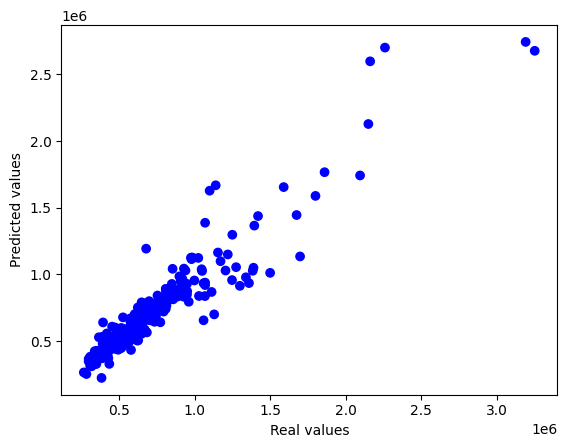

In [86]:
import matplotlib.pyplot as plt
colors = ['red' if real == predicted else 'blue' for real, predicted in zip(y_test, predictions)]

# Plot the real values and predicted values using the colors list
plt.scatter(y_test, predictions, color=colors)

# Add labels to the x-axis and y-axis
plt.xlabel('Real values')
plt.ylabel('Predicted values')

# Show the plot
plt.show()

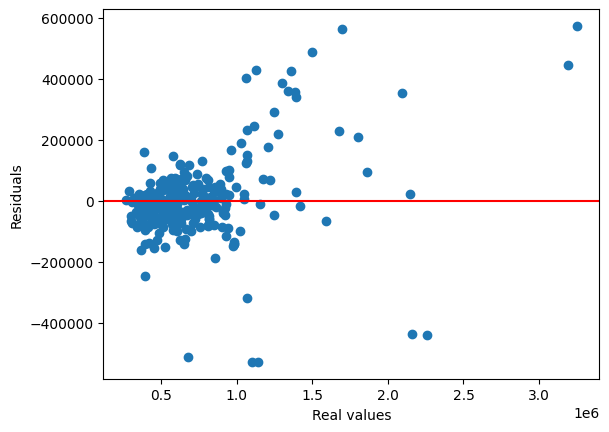

In [87]:
# Calculate the residuals (real values - predicted values)
residuals = y_test - predictions

# Plot the residuals
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='-')

# Add labels to the x-axis and y-axis
plt.xlabel('Real values')
plt.ylabel('Residuals')

# Show the plot
plt.show()

In [88]:
df

      Marka_Model_0  Marka_Model_1  Marka_Model_2  Marka_Model_3  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
1512              0              0              0              0   
1513              0              0              0              0   
1514              0              0              0              0   
1515              0              0              0              0   
1516              0              0              0              0   

      Marka_Model_4  Marka_Model_5  Marka_Model_6  Marka_Model_7    Hiz  \
0                 0              0              0              1  170.0   
1                 0              

In [89]:
#tamamını eğittim ya modeli şimdi direk üzerinde deneyecem
new_pred =final_model.predict(X) 

In [90]:
new_pred

array([427927.8 , 391702.06, 411034.22, ..., 387202.75, 416316.75,
       377700.34], dtype=float32)

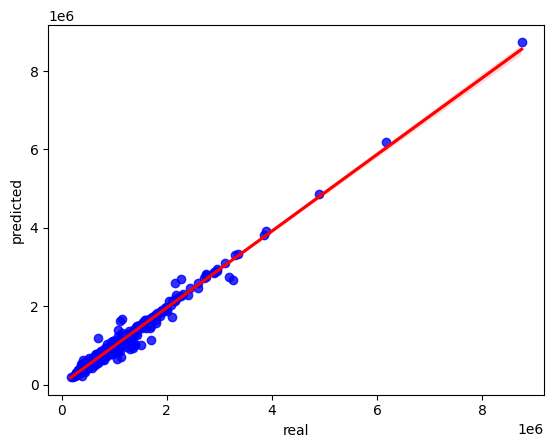

In [91]:
#ake a dataframe with the real values and the predicted values
import seaborn as sns
y = y.astype(float)
df8 = pd.DataFrame({'real': y, 'predicted': new_pred})

# Use seaborn to plot a scatterplot with a regression line and dots
sns.regplot(x='real', y='predicted', data=df8,scatter_kws={'color': 'blue'},line_kws={'color': 'red'})
plt.show()

In [92]:
df8

          real     predicted
0     400000.0  427927.81250
1     411500.0  391702.06250
2     415000.0  411034.21875
3     445000.0  502702.78125
4     450000.0  498171.15625
...        ...           ...
1512  387500.0  387202.75000
1513  390000.0  386553.71875
1514  394500.0  387202.75000
1515  395000.0  416316.75000
1516  400000.0  377700.34375

[1516 rows x 2 columns]

In [93]:
#Bİşeyler yaptım karıştırdım ilk başta X_train_ytrain vs die bölmedim k-fold yapıyom die ama doru mu yaptım bilmiyorum oradan tam emin deilim.
#GALİBA ŞÖLE OLUCAK: Şİmdi KFOLD İLE BEN SADECE EN EN OPTİMUM PRAMETRELERİ BULDUM ONDAN SONRAKİ EĞİTİM OLAYINDA BÖLMEM VE X_TRAİN_X_tEXT,Y_TRAİNY_TEST E GÖRE modele sokup sonrasında da denemem lazım overfitting vs var mı die artık bunu yarın yapıcam
#BU bittikten sonra da Nasıl Streamlit e aktarıcam Joblib le mi filan oraya bi bakıcam oraları tam anlamadım.

MSE: 16738778014.85
RMSE: 129378.43
R2: 0.888897599764878

In [94]:
#model.save_config()

In [95]:
#Binary encoder yaptığım kısımda n salllıyorum 1000101 WV polo mı vs onu bi yere kaydetmem lazım sonra yapıcam.
#Bde params kısmını buna göre bi  denesem daha güzel olacak sanki